In [1]:
# get matplotlib configuration
%run plot_conf.py

In [2]:
from data.VideoFolder import VideoFolder

In [9]:
my_data = VideoFolder('data/256min_data_set/')

100%|███████████████████████████████████████████| 35/35 [00:51<00:00,  1.23s/it]


There are 985
The 10 shortest videos have 40 71 81 102 107 113 115 123 125 126 frames
The 10 longest videos have 760 802 807 831 960 980 1042 1220 1388 1546 frames


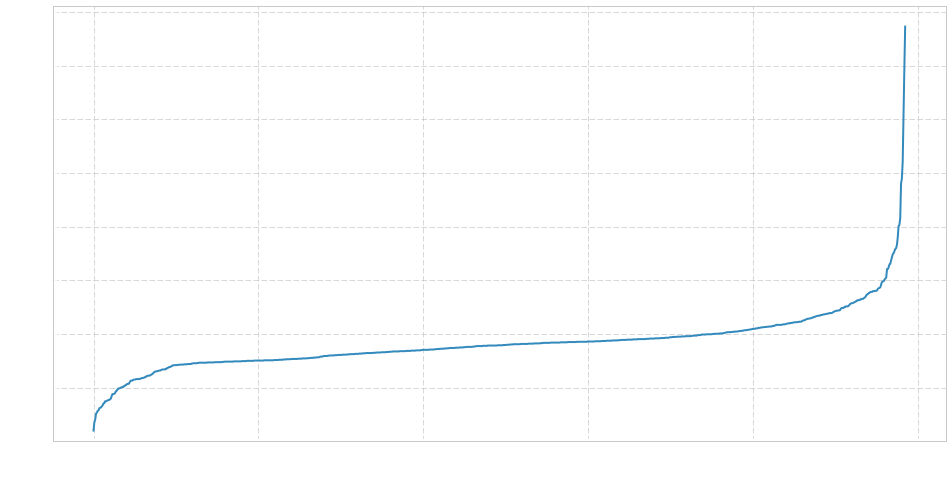

In [25]:
def process(data):
    
    nb_videos = len(data.videos)
    frames_per_video = tuple(last - first + 1 for ((last, first), _) in data.videos)
    sorted_frames = sorted(frames_per_video)
    plt.plot(sorted_frames)
    plt.ylabel('Number of frames')
    plt.xlabel('Sorted video index')
    plt.ylim(ymin=0)
    print('There are', len(frames_per_video))
    print('The 10 shortest videos have', *sorted_frames[:10], 'frames')
    print('The 10 longest videos have', *sorted_frames[-10:], 'frames')
    
    return nb_videos, frames_per_video

(nb_videos, frames_per_video) = process(my_data)

nu: 2.21
Average length (frames): 354
90% interval: [208, 500]
95% interval: [144, 564]


 0   1  40
 1   2  70
 2   8 100
 3  11 130
 4   7 160
 5  15 191
 6  28 221
 7  23 251
 8 172 281
 9 140 311
10 192 341
11 160 371
12  67 401
13  47 432
14  33 462
15  18 492
16  16 522
17  15 552
18   7 582
19   2 612
20   3 642
21   4 673
22   4 703
23   1 733
24   0 763


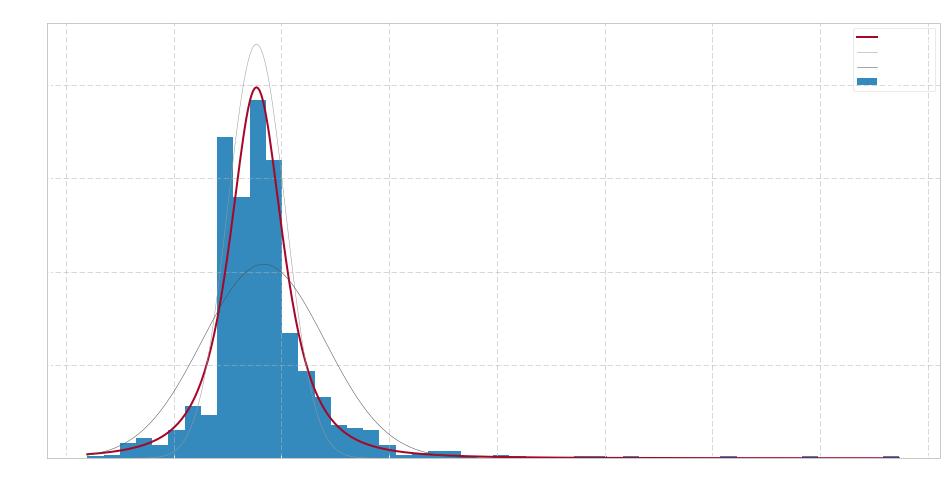

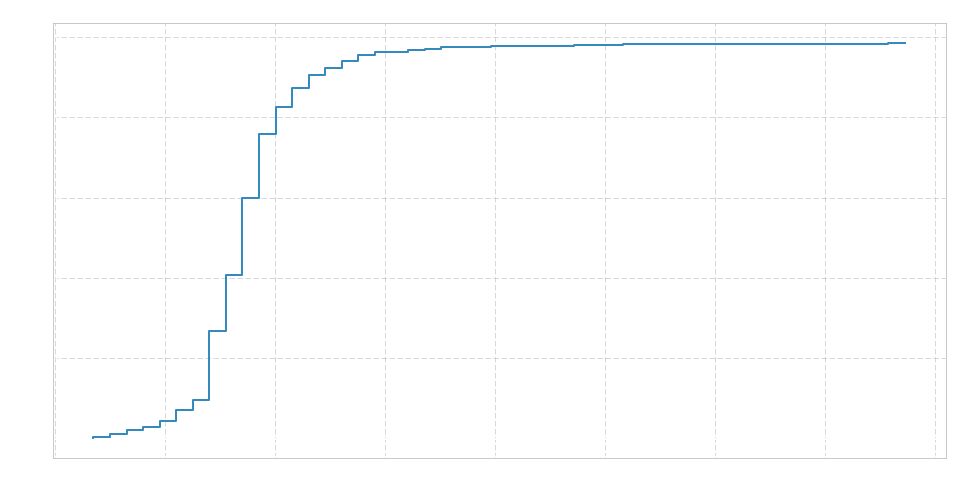

In [32]:
def fit_distribution(frames_count, nb_videos, enough=1e3):
    plt.figure(1)
    n, bins, patches = plt.hist(frames_count, bins=50)
    bin_width = bins[1] - bins[0]
    plt.xlabel('Frame count')
    plt.ylabel('Video count')

    from scipy.stats import t
    import numpy as np
    param = t.fit(frames_count)
    x = np.linspace(min(frames_count),max(frames_count),500)
    area = len(frames_count) * bin_width
    pdf_fitted = t.pdf(x, param[0], loc=param[1], scale=param[2]) * area
    plt.plot(x, pdf_fitted)

    from scipy.stats import norm
    normal_pdf = norm.pdf(x, loc=param[-2], scale=param[-1]) * area
    plt.plot(x, normal_pdf, c='.6', linewidth=.5)
    p = norm.fit(frames_count)
    normal_pdf = norm.pdf(x, loc=p[-2], scale=p[-1]) * area
    plt.plot(x, normal_pdf, c='.3', linewidth=.5)

    plt.legend(('t-student', 'norm1', 'norm2', 'hist'))
    plt.title('Frame count distribution')


    # draw limits
    plt.figure(2)
    plt.axhline(y=0)
    plt.axhline(y=nb_videos)

    y = n.cumsum()

    plt.step(bins[1:], y)
    plt.title('Frame count cumulative distribution')
    plt.xlabel('Frame count *fc*')
    plt.ylabel('Nb of video with at least *fc* frames');
    
    print('nu: {:.2f}'.format(param[0]))
    print('Average length (frames): {:.0f}'.format(param[1]))
    print('90% interval: [{:.0f}, {:.0f}]'.format(*t.interval(0.90, param[0], loc=param[1], scale=param[2])))
    print('95% interval: [{:.0f}, {:.0f}]'.format(*t.interval(0.95, param[0], loc=param[1], scale=param[2])))
    print('\n')
    
    for i, p in enumerate(zip(n, bins)):
        print('{:2d} {:3.0f} {:3.0f}'.format(i, *p))
        if i >= enough - 1: break
    
fit_distribution(frames_per_video, nb_videos, enough=25)

In [27]:
# getting new stats
my_train_data = VideoFolder('data/processed-data/train/')

100%|███████████████████████████████████████████| 35/35 [00:39<00:00,  1.07it/s]


There are 841
The 10 shortest videos have 88 89 91 92 94 97 99 101 110 114 frames
The 10 longest videos have 504 504 504 504 505 505 505 505 514 514 frames


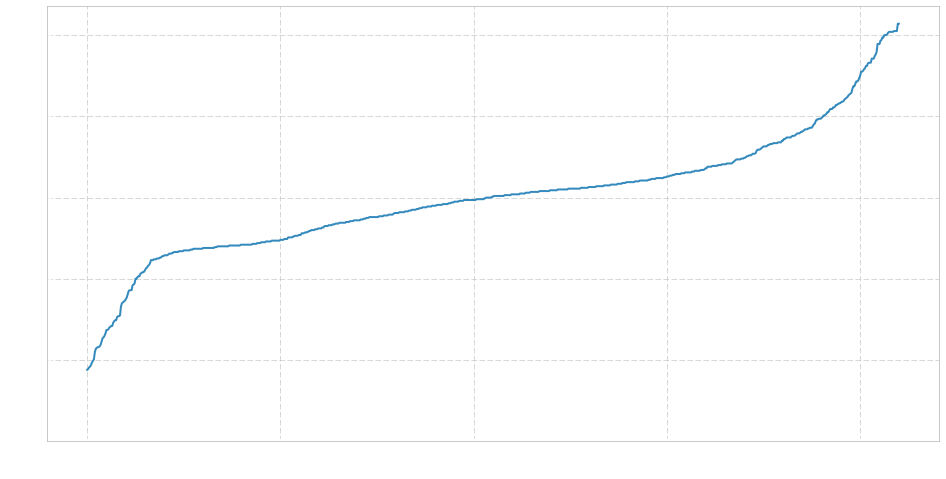

In [28]:
(nb_train_videos, frames_per_train_video) = process(my_train_data)

nu: 3.67
Average length (frames): 297
90% interval: [179, 416]
95% interval: [141, 453]


 0   5  88
 1   3  97
 2   1 105
 3   6 114
 4   4 122
 5   4 131
 6   5 139
 7   7 148
 8   0 156
 9   5 165
10   3 173
11   4 182
12   3 190
13   7 199
14   6 207
15   9 216
16  18 224
17  69 233
18  49 241
19  22 250
20  24 258
21  38 267
22  41 275
23  41 284
24  45 292


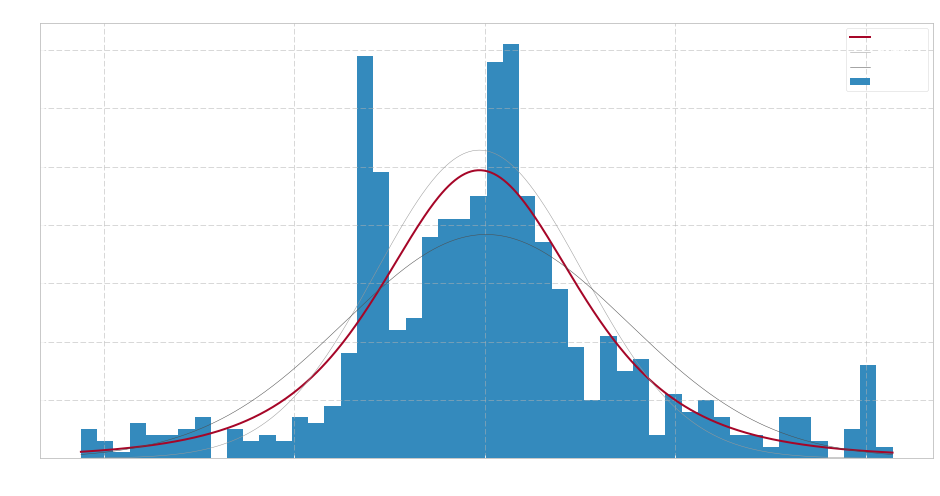

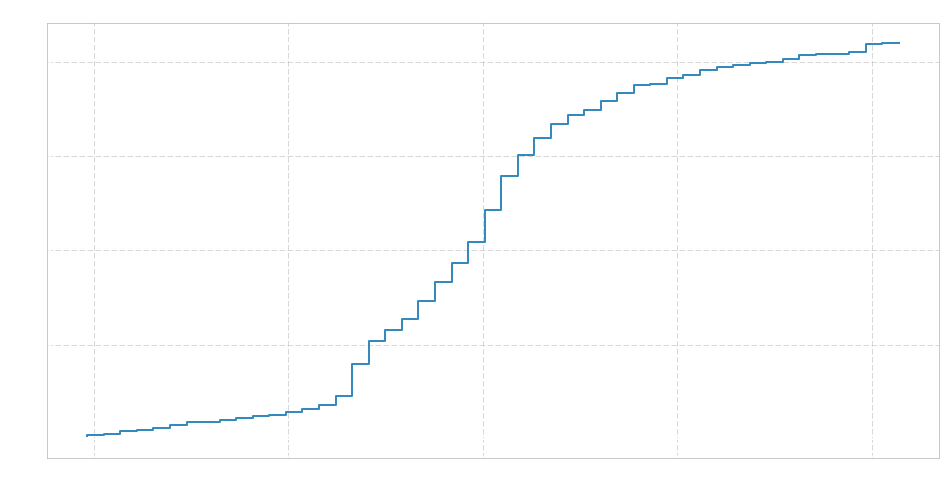

In [33]:
fit_distribution(frames_per_train_video, nb_train_videos, enough=25)

In [35]:
# get videos length and name
a = tuple((last - first + 1, i) for (i, ((last, first), _)) in enumerate(my_train_data.videos))
b = sorted(a)  # sort by length
print('5 longest videos', *b[-5:], sep='\n')
v = my_train_data.videos[b[-1][1]]
print('The longest video is:', v[1][0])
print('which has length: ', v[0][0] - v[0][1] + 1)

5 longest videos
(505, 295)
(505, 712)
(505, 813)
(514, 110)
(514, 111)
The longest video is: cellphone/video_20160710_081530.mp4
which has length:  514


In origin, this was `floor/VID_20160605_094332.mp4`, with variable frame rate, and `1149` output frames.

In [30]:
# getting new stats
my_val_data = VideoFolder('data/processed-data/val/')

100%|█████████████████████████████████████████| 970/970 [00:51<00:00, 18.82it/s]


There are 970
The 10 shortest videos have 35 35 35 35 36 36 36 36 36 36 frames
The 10 longest videos have 60 60 60 61 61 61 61 61 61 61 frames


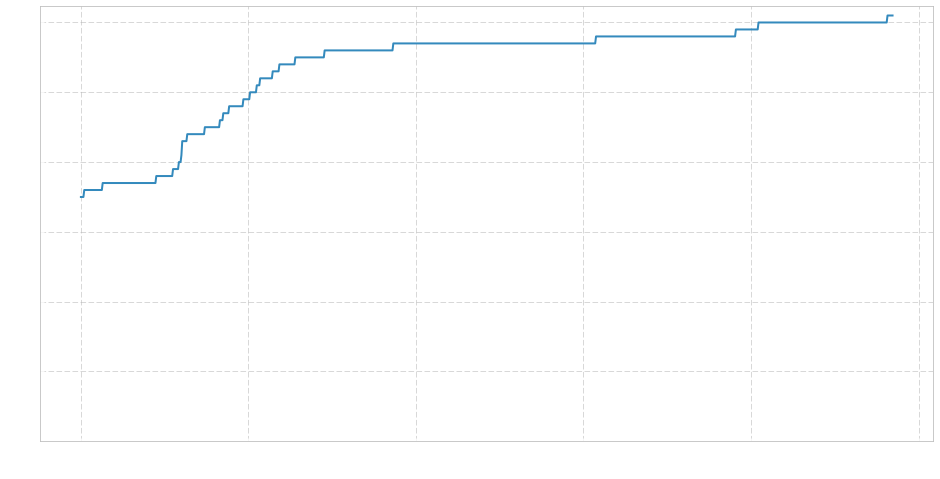

In [31]:
(nb_val_videos, frames_per_val_video) = process(my_val_data)

Damn `ffmpeg` with its shitty `-sseof -<seconds>` option. Better to use `-filter_complex select` and output one input file and stream to two single-stream files.

In [3]:
my_sampled_data = VideoFolder('data/sampled-data/train/')

100%|███████████████████████████████████████| 3880/3880 [03:11<00:00, 21.43it/s]


There are 3880
The 10 shortest videos have 30 30 30 30 30 30 30 30 30 30 frames
The 10 longest videos have 114 114 114 114 114 115 115 115 115 115 frames


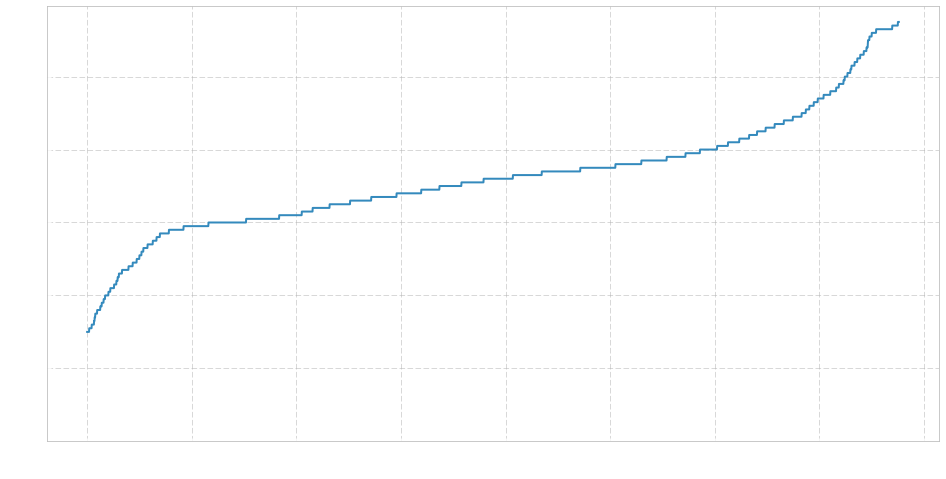

In [5]:
(nb_sampled_videos, frames_per_sampled_video) = process(my_sampled_data)

In [4]:
my_sampled_data.frames_per_class[:5]

[174, 227, 288, 287, 321]

In [8]:
[sum(my_sampled_data.frames_per_video[4*a:4*a+4]) for a in range(0,5)]

[174, 227, 288, 287, 321]

In [9]:
len(my_sampled_data.classes)

970

In [26]:
my_sampled_val_data = VideoFolder('data/sampled-data/val/', init_shuffle='init')

100%|█████████████████████████████████████████| 970/970 [00:50<00:00, 19.16it/s]


There are 970
The 10 shortest videos have 30 30 31 31 31 31 32 32 33 34 frames
The 10 longest videos have 113 113 113 113 113 113 113 113 114 114 frames


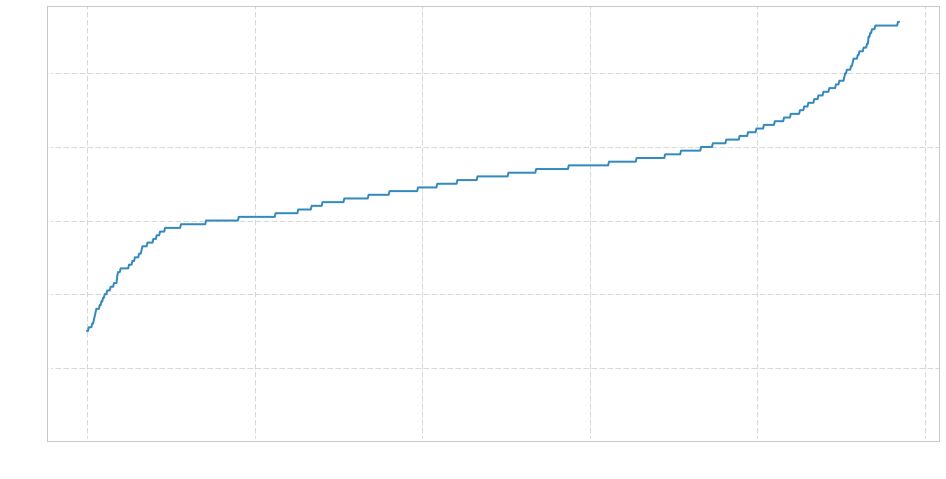

In [27]:
(nb_sampled_val_videos, frames_per_sampled_val_video) = process(my_sampled_val_data)

In [32]:
len(my_sampled_val_data.videos)

970

In [33]:
len(my_sampled_data.videos)

3880

In [35]:
my_sampled_val_data.videos[:10]

[((75, 0), ('tree-V60722-085425/5.mp4', 883)),
 ((142, 76), ('tree-VID_20160613_181757/5.mp4', 896)),
 ((219, 143), ('lawn-V60722-090000/5.mp4', 452)),
 ((299, 220), ('motorbike-20160723_064110/5.mp4', 505)),
 ((342, 300), ('shoes-20160613_135526/5.mp4', 702)),
 ((418, 343), ('kitchen-utensils-20160613_135334/5.mp4', 389)),
 ((477, 419), ('floor-0706_7/5.mp4', 312)),
 ((571, 478), ('cup-VID_20160610_032501/5.mp4', 257)),
 ((630, 572), ('sidewalk-sidewalk1/5.mp4', 772)),
 ((719, 631), ('road-video_20160716_095947/5.mp4', 673))]

In [36]:
my_sampled_data.videos[:10]

[((43, 0), ('barcode-20160613_140057/3.mp4', 0)),
 ((87, 44), ('barcode-20160613_140057/4.mp4', 0)),
 ((130, 88), ('barcode-20160613_140057/2.mp4', 0)),
 ((173, 131), ('barcode-20160613_140057/1.mp4', 0)),
 ((229, 174), ('barcode-20160613_140115/3.mp4', 1)),
 ((286, 230), ('barcode-20160613_140115/4.mp4', 1)),
 ((343, 287), ('barcode-20160613_140115/2.mp4', 1)),
 ((400, 344), ('barcode-20160613_140115/1.mp4', 1)),
 ((472, 401), ('barcode-20160613_140138/3.mp4', 2)),
 ((544, 473), ('barcode-20160613_140138/4.mp4', 2))]